# Optimization Using Newton's Method

Implementing Newton's method optimizing some functions in one and two variables. Also compareing Newton's method with the gradient descent, experiencing advantages and disadvantages of each of the methods.

# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## 1 - Function in One Variable

In [2]:
def f_ex_1(x):
    return np.exp(x) - np.log(x)

def dfdx_ex_1(x):
    return np.exp(x) - 1/x

def d2fdx2_ex_1(x):
    return np.exp(x) + 1/(x**2)

x_0 = 1.6
print(f"f({x_0}) = {f_ex_1(x_0)}")
print(f"f'({x_0}) = {dfdx_ex_1(x_0)}")
print(f"f''({x_0}) = {d2fdx2_ex_1(x_0)}")

f(1.6) = 4.483028795149379
f'(1.6) = 4.328032424395115
f''(1.6) = 5.343657424395115


Plotting the function to visualize the global minimum

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f\\,(x)$'>)

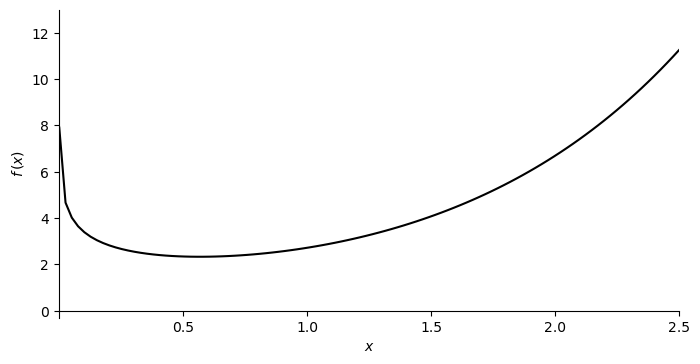

In [4]:
def plot_f(x_range, y_range, f, ox_position):
    x = np.linspace(*x_range, 100)
    fig, ax = plt.subplots(1,1,figsize=(8,4))

    ax.set_ylim(*y_range)
    ax.set_xlim(*x_range)
    ax.set_ylabel('$f\,(x)$')
    ax.set_xlabel('$x$')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', ox_position))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.autoscale(enable=False)
    
    pf = ax.plot(x, f(x), 'k')
    
    return fig, ax

plot_f([0.001, 2.5], [-0.3, 13], f_ex_1, 0.0)